In [288]:
from sklearn.cluster import MiniBatchKMeans

In [289]:
# два кластера и подвыборки объёма 6

kmeans = MiniBatchKMeans(n_clusters=2,random_state=42,batch_size=6, verbose = 5)

In [290]:
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

In [291]:
#def get_silhouette(cluster_num, X):
    #k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    #k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    #silhouette = silhouette_score(X, k_means.labels_)
    #return silhouette

#silhouette = []
#for clust_num in range(2, 10):
    #silhouette.append(get_silhouette(clust_num, X))

4. K-Means и EM-алгоритм: практика

In [292]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics
from sklearn import linear_model

In [293]:
df_snsdata = pd.read_csv('C:\скил\DST-156\IDE_NEW\MATH&ML-10. Кластеризация и техники понижения размерности. Часть I/snsdata.csv')
df_snsdata.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [294]:
df_snsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

Задание 4.1

2/2 points (graded)

Мы будем реализовывать алгоритм только на признаках, которые заключают в себе ключевые слова, встречающиеся в сообщениях подростка. Удалите все остальные признаки. Какова размерность вашего текущего набора данных?

In [295]:
df_snsdata = df_snsdata.drop(['gradyear','gender','age','friends'], axis=1)
df_snsdata.shape

(30000, 36)

In [296]:
df_snsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   basketball    30000 non-null  int64
 1   football      30000 non-null  int64
 2   soccer        30000 non-null  int64
 3   softball      30000 non-null  int64
 4   volleyball    30000 non-null  int64
 5   swimming      30000 non-null  int64
 6   cheerleading  30000 non-null  int64
 7   baseball      30000 non-null  int64
 8   tennis        30000 non-null  int64
 9   sports        30000 non-null  int64
 10  cute          30000 non-null  int64
 11  sex           30000 non-null  int64
 12  sexy          30000 non-null  int64
 13  hot           30000 non-null  int64
 14  kissed        30000 non-null  int64
 15  dance         30000 non-null  int64
 16  band          30000 non-null  int64
 17  marching      30000 non-null  int64
 18  music         30000 non-null  int64
 19  rock          30000 non-n

In [297]:
# эталонное решение
#df_snsdata = df_snsdata.iloc[:, 4:]
#df_snsdata.shape

Задание 4.2

1 point possible (graded)

Теперь нормализуйте данные с помощью StandardScaler(). Для получившейся матрицы нормализованных признаков выведите самое первое значение в самой первой строке (X_norm[0][0]). Ответ округлите до двух знаков после точки-разделителя.

In [298]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
X=df_snsdata.values
scaler = StandardScaler()
scaler.fit(X)
X_std=scaler.transform(df_snsdata)
print(round(X_std[0][0],2))


-0.33


C:\Users\molde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [299]:
#Эталонный ответ
#X = df_sns.values
#scaler = StandardScaler()
#scaler.fit(X)
#X_norm = scaler.transform(X)
#X_norm[0][0]

Задание 4.3

1 point possible (graded)

Реализуйте алгоритм k-means c девятью кластерами. В качестве значения параметра random_state возьмите число 42. Выведите получившееся значение инерции (model.inertia_). Ответ округлите до двух знаков после точки-разделителя.

In [300]:
#pip install -U pandas numpy scikit-learn

In [301]:
import pandas as pd
import numpy as np
import sklearn

print(pd.__version__)
print(np.__version__)
print(sklearn.__version__)

2.2.3
1.26.4
1.5.2


In [302]:
from sklearn import datasets
from sklearn.cluster import KMeans

In [303]:
model = KMeans(n_clusters=9, random_state=42)
model.fit(X_std)
round (model.inertia_,2)

856276.7

In [304]:
model.labels_

array([1, 2, 1, ..., 1, 1, 1])

Задание 4.4

0.0/2.0 points (graded)

Сколько подростков относится к наиболее многочисленному кластеру?
А сколько — к самому малочисленному?


In [305]:
#df_snsdata.loc[:, 'label'].value_counts().max()

In [306]:
#df_snsdata.loc[:, 'label'].value_counts().min()

In [307]:
# эталонный ответ
df_snsdata.loc[:, 'label'] = model.labels_
df_snsdata.label.value_counts()

label
1    19599
2     4284
0     2201
4      941
3      902
5      851
8      754
7      467
6        1
Name: count, dtype: int64

Задание 4.5

0.0/2.0 points (graded)

1. Мы выделили девять кластеров, но, возможно, это далеко не оптимальное количество. Давайте попробуем применить разные методы для нахождения числа кластеров. Будем выбирать количество кластеров из диапазона от 3 до 9.

Для начала примените метод локтя. Каким в этом случае будет оптимальное число кластеров? Если оно не идентифицируется однозначно, запишите количество кластеров, при котором достигается наименьшая инерция.

2. Теперь попробуйте подобрать оптимальное количество кластеров с помощью коэффициента силуэта. Каким оно будет?

Если невозможно однозначно определить количество кластеров, при котором достигается максимальное значение коэффициента силуэта, выберите наименьшее количество кластеров из подходящих.

Внимание: программа может выполняться несколько минут — будьте готовы подождать.

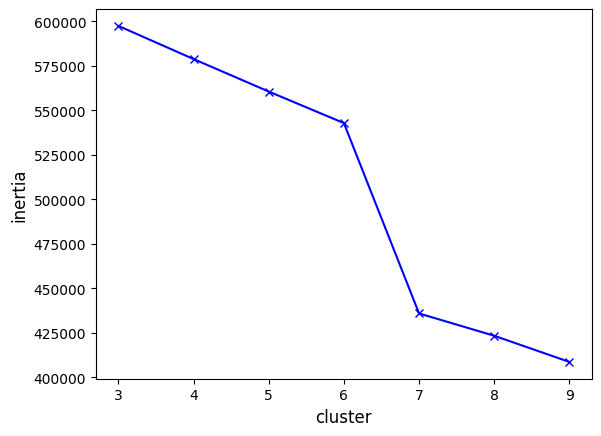

In [319]:
def get_inertia(cluster_num, X_std):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    inertia = k_means.inertia_
    return inertia
 
inertia = []
for cluster_num in range(3, 10):
    inertia.append(get_inertia(cluster_num, X_std))
 
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
plt.plot([i for i in range(3, 10)], inertia, 'xb-')

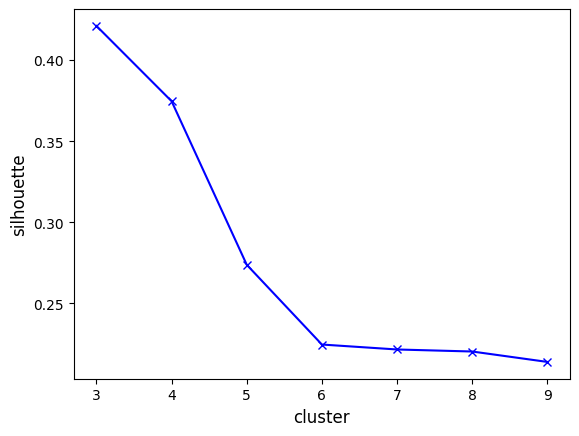

In [320]:
from sklearn.metrics import silhouette_score

def get_silhouette(cluster_num, X_std):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    silhouette = silhouette_score(X, k_means.labels_, metric='euclidean')
    return silhouette

silhouettes = []
for i in range(3, 10):
    silhouettes.append(get_silhouette(i, X_std))
    
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(3, 10)], silhouettes, 'xb-')

Задание 4.6

2 points possible (graded)

Мы будем использовать результаты, полученные в предыдущем задании с помощью коэффициента силуэта.

Реализуйте сегментацию подростков на выбранном количестве кластеров.

Для каждого кластера составьте топ-10 самых частых слов, назовём их ключевыми. Для этого сгруппируйте данные по кластерам, в каждом кластере вычислите среднее по каждому признаку, отсортируйте данные по убыванию и выделите первые 10 строк.

Найдите среди ключевых слов те, которые характерны для каждого кластера, то есть встречаются в каждом из них.

Отметьте эти слова:

In [321]:
model = KMeans(n_clusters=3, random_state=42) 
model.fit(X_std) 
df_snsdata.loc[:, 'label'] = model.labels_ 
df_snsdata['label'].value_counts()

top_list = []
for label, group in df_snsdata.groupby('label'):
    means = group.iloc[:,:-1].mean().sort_values(ascending=False)
    top_5 = set(means.head(10).index)
    top_list.append(top_5)

set.intersection(*top_list)

{'dance', 'god', 'hair', 'music'}

In [322]:
df_snsdata.loc[:, 'label'] = model.labels_
df_snsdata.label.value_counts()

label
0    22900
2     5966
1     1134
Name: count, dtype: int64

Задание 4.7

1 point possible (graded)

Итак, с k-means мы потренировались — теперь перейдём к EM-алгоритму.

Реализуйте EM-алгоритм (GaussianMixture) для такого же количества кластеров, как и в предыдущем задании. В качестве значения параметра random_state возьмите число 42.

Сколько подростков алгоритм отнёс к самому многочисленному кластеру?

In [323]:
from sklearn.mixture import GaussianMixture

In [324]:
model = GaussianMixture(n_components=3, random_state=42)
#model_EM.fit(X_std) 
predictions = model.fit_predict(X_std)
np.unique(predictions, return_counts=True)

(array([0, 1, 2], dtype=int64), array([20670,  2874,  6456], dtype=int64))

Задание 4.8

0.0/1.0 point (graded)

В одном из кластеров оказался всего один человек. Давайте узнаем, что это за подросток и чем он(а) интересуется.

Отметьте три слова, которые чаще всего встречаются в сообщениях этого подростка:

In [325]:
a = np.where(predictions == 2)
df_snsdata.iloc[a]

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,label
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
19,0,0,0,0,0,0,1,0,0,0,...,1,2,0,1,1,0,0,0,0,2
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2,0,0,0,0,2
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
29984,2,0,4,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,2
29987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
29988,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0


7. Итоговая практика по алгоритмам кластеризации

In [418]:
df_CC_GENERAL = pd.read_csv('C:\скил\DST-156\IDE_NEW\MATH&ML-10. Кластеризация и техники понижения размерности. Часть I/CC GENERAL.csv')
df_CC_GENERAL.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [419]:
df_CC_GENERAL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Задание 7.2

1 point possible (graded)

Теперь приступим к анализу данных. По традиции начнём его с проверки данных на наличие пропущенных значений. Сколько всего пропусков в данных?

In [420]:
df_CC_GENERAL.isnull().sum().sum()

314

Задание 7.3

1 point possible (graded)

Заполните все пропуски средними арифметическими для признаков. Каким будет среднее арифметическое для признака MINIMUM_PAYMENTS (если считать после заполнения пропущенных значений)? Округлите результат до двух знаков после точки-разделителя.

In [421]:
df_CC_GENERAL.fillna(df_CC_GENERAL.mean(numeric_only=True), inplace=True)
round (df_CC_GENERAL['MINIMUM_PAYMENTS'].mean(numeric_only=True),2)

864.21

In [422]:
df_CC_GENERAL.isnull().sum().sum()

0

Задание 7.4

1 point possible (graded)

Теперь нормализуйте данные с помощью StandardScaler(). Для получившейся матрицы нормализованных признаков выведите самое первое значение в самой первой строке (X_norm[0][0]). Округлите до двух знаков после точки-разделителя.

Не забудьте предварительно удалить признак CUST_ID — он не поможет при кластеризации, так как не несёт никакой содержательной информации.

In [423]:
df_CC_GENERAL=df_CC_GENERAL.drop(columns='CUST_ID', axis=1)
df_CC_GENERAL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [424]:
#df_CC_GENERAL.drop('CUST_ID', axis = 1, inplace = True)
X_df_CC_GENERAL=df_CC_GENERAL.values
scaler = StandardScaler()
scaler.fit(X_df_CC_GENERAL)
X_std_df_CC_GENERAL=scaler.transform(df_CC_GENERAL)
print(round(X_std_df_CC_GENERAL[0][0],2))

-0.73


C:\Users\molde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [425]:
X_std_df_CC_GENERAL

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [426]:
df_CC_GENERAL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

Задание 7.5

1 point possible (graded)

Теперь можем приступать к кластеризации. Начнём с самого простого и популярного метода — k-means. Для того чтобы его применить, необходимо узнать число кластеров. Наилучший способ сделать это — применить коэффициент силуэта. Найдите с его помощью оптимальное количество кластеров, перебрав диапазон от 2 до 9 включительно. В этом и следующем заданиях для параметра random_state возьмём значение 42.

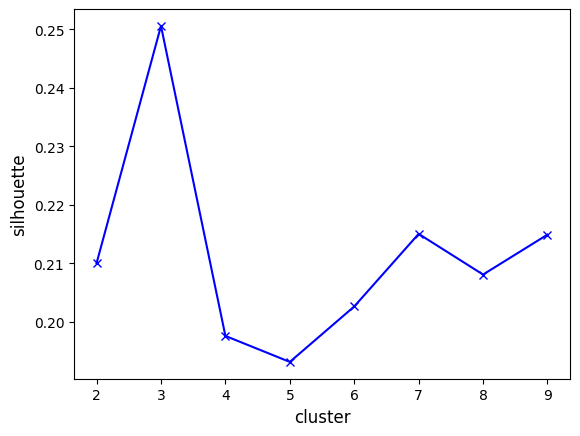

In [427]:
def get_silhouette(cluster_num, df_CC_GENERAL):
    k_means =  KMeans(n_clusters=cluster_num, n_init=10, random_state=42)
    k_means.fit(df_CC_GENERAL)
    silhouette = silhouette_score(df_CC_GENERAL, k_means.labels_, metric='euclidean')
    return silhouette
from sklearn.metrics import silhouette_score
silhouettes = []
for i in range(2, 10):
    silhouettes.append(get_silhouette(i ,X_std_df_CC_GENERAL))
    
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouettes, 'xb-')

Задание 7.6

1 point possible (graded)

Теперь реализуем непосредственно кластеризацию k-means с оптимальным количеством кластеров, которое мы определили в предыдущем задании.

Сколько человек оказалось в самой малочисленной группе?

In [428]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_std_df_CC_GENERAL)
df_CC_GENERAL.loc[:, 'label'] = kmeans.labels_
df_CC_GENERAL.label.value_counts()

label
1    4559
2    3150
0    1241
Name: count, dtype: int64

Задание 7.7

1 point possible (graded)

Попробуем применить DBSCAN. Для начала реализуйте его с параметрами по умолчанию.

Сколько кластеров было выделено?

In [429]:
from sklearn.cluster import DBSCAN


In [430]:
db = DBSCAN()
db.fit(X_std_df_CC_GENERAL)
clusters = db.labels_
len(set(clusters)) - (1 if -1 in clusters else 0)

38

Задание 7.8

3 points possible (graded)

В предыдущем задании получилось очень много кластеров. Возможно, это случилось потому, что мы взяли параметры по умолчанию, а результат алгоритма DBSCAN, как вы помните, очень чувствителен к ним.

Давайте попробуем с помощью цикла перебрать параметр eps по значениям, заданным как np.arange(0.1,3,0.2), а параметр min_samples — по значениям, заданным как range(1,20,4). Найдите комбинацию, которая даёт максимальное значение коэффициента силуэта.

In [431]:
siliuette_list_dbscan = []
 
for eps in np.arange(0.1,3,0.2):
    for min_sample in range(1,20,4):
        dbscan = DBSCAN(eps=eps, min_samples=min_sample)
        dbscan.fit(X_std_df_CC_GENERAL)
        sil_score = silhouette_score(X_std_df_CC_GENERAL, dbscan.labels_, metric='euclidean')
        siliuette_list_dbscan.append((eps, min_sample, sil_score, len(set(dbscan.labels_))) )
df_dbscan = pd.DataFrame(siliuette_list_dbscan, columns=['eps', 'min_samples', 'sil_score', 'number_of_clusters'])
df_dbscan.sort_values(by = 'sil_score')

,eps,min_samples,sil_score,number_of_clusters
11,0.5,5,-0.443701,39
16,0.7,5,-0.438837,29
6,0.3,5,-0.424475,42
7,0.3,9,-0.404209,15
30,1.3,1,-0.399305,1536
...,...,...,...,...
74,2.9,17,0.591924,2
66,2.7,5,0.592182,2
73,2.9,13,0.595399,2
72,2.9,9,0.603811,2


Задание 7.9

1 point possible (graded)

Теперь давайте реализуем агломеративную иерархическую кластеризацию. Переберите количество кластеров в диапазоне от 3 до 9 включительно и найдите то их число, которое будет давать максимальный коэффициент силуэта.

In [432]:
from sklearn.cluster import AgglomerativeClustering

In [433]:
siliuette_list_hierarchical = []
 
for cluster in range(3,10,1):
        agglomerative = AgglomerativeClustering(metric='euclidean',n_clusters=cluster).fit_predict(X_std_df_CC_GENERAL)
        sil_score = silhouette_score(X_std_df_CC_GENERAL, agglomerative, metric='euclidean')
        siliuette_list_hierarchical.append((cluster, sil_score,len(set(agglomerative)) ) )
        
df_hierarchical = pd.DataFrame(siliuette_list_hierarchical, columns=['cluster', 'sil_score','number_of_clusters'])
 
 
df_hierarchical.sort_values(by = 'sil_score')

,cluster,sil_score,number_of_clusters
5,8,0.152035,8
6,9,0.153719,9
1,4,0.154709,4
4,7,0.156415,7
2,5,0.158069,5
0,3,0.173110,3
3,6,0.173356,6


Задание 7.10

1 point possible (graded)

Сколько будет наблюдений в самом многочисленном классе, если мы обучим на наших данных модель агломеративной иерархической кластеризации с количеством кластеров, полученным в предыдущем задании?

In [436]:
model = AgglomerativeClustering(metric='euclidean', n_clusters=6).fit(X_std_df_CC_GENERAL)
df_CC_GENERAL['cluster_id'] = model.labels_
df_CC_GENERAL['cluster_id'].value_counts()

cluster_id
0    3946
1    2931
2     864
5     722
3     464
4      23
Name: count, dtype: int64

Давайте визуализируем результаты кластеризации k-means, отобразив два признака — количество покупок и кредитный лимит:

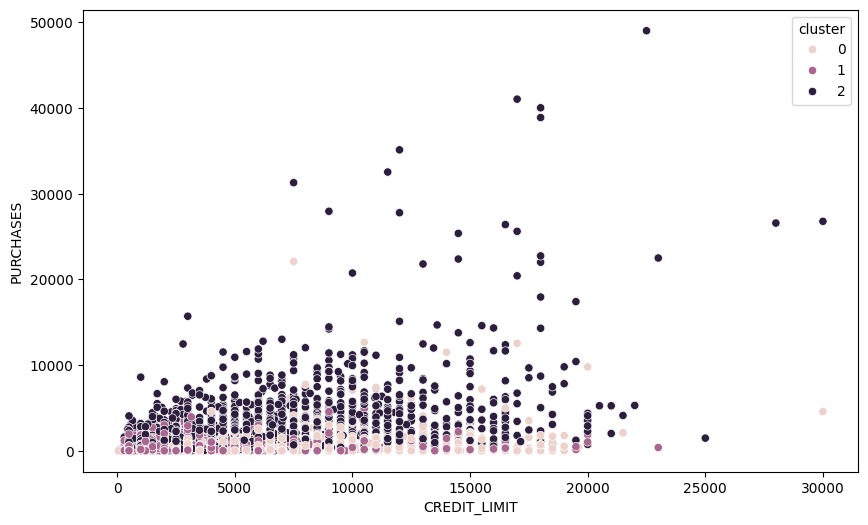

In [437]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_std_df_CC_GENERAL)
df_CC_GENERAL['cluster'] = kmeans.labels_
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_CC_GENERAL, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster')
plt.show()

Мы видим, что практически все точки очень плотно сконцентрированы вместе, так что наши результаты с другими алгоритмами вполне предсказуемы.

С точки зрения интерпретации на графике явно выделяется группа тех, кто совершает много покупок по кредитной карте, и тех, кто совершает их меньше и имеет меньший кредитный лимит.

Но, разумеется, это лишь приблизительная интерпретация, ведь качественного разбиения с помощью большинства методов мы так и не получили, а кроме того, здесь мы видим лишь два признака из многих, на основе которых осуществлялась кластеризация.